## Exponential decay process 

Demonstration: 
    1. Counting data from a exponentially decaying process
    2. Exponential model
    3. Maximum likelihood with Poisson error distribution.
    4. AmoebaFitter with other error distributions.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import ExpModel
from BayesicFitting import PolynomialModel
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import AmoebaFitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import printclass
import matplotlib.pyplot as plt


define some constants

In [2]:
N = 201
a = 17.8
b = -0.2

make a 3-degree polynomial

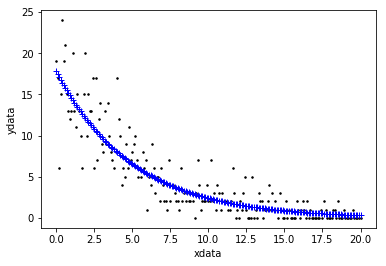

In [3]:
x = numpy.linspace( 0.0, 20.0, N, dtype=float )
ym = a * numpy.exp( b * x )

#y = ym + numpy.random.lognormal( ym, numpy.sqrt( ym ), N )
#y = numpy.asarray( y, dtype=int )
y = numpy.random.poisson( ym )
# plot the data along with the "truth"
plotFit( x, y, show=False )
plt.plot( x, ym, 'b+')
plt.show()

Define the model

In [4]:
mdl = ExpModel( )
print( mdl )


Exp: f( x:p ) = p_0 * exp( p_1 * x )


define the fitter: AmoebaFitter with error distribution

In [5]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
 
# find the parameters
param = fitter.fit( y )

# show all attributes of the fitter class 
printclass( fitter )

+++++++++++++++++++++++++++++++++++++++++++++++++++++++
AmoebaFitter
+++++++++++++++++++++++++++++++++++++++++++++++++++++++
chisq           1058.7523133732468
errdis          poisson
fitIndex        None
fixedScale      None
imageAssistant  None
isChisq         False
iter            35
keep            None
landscape       <BayesicFitting.source.MaxLikelihoodFitter._LogL object at 0x107154b70>
logLikelihood   -369.8784922552351
maxIter         2000
model           Exp
ndim            1
npfit           2
ntrans          69
nxdata          201
plotfreq        0
plotter         <BayesicFitting.source.IterationPlotter.IterationPlotter object at 0x107154ac8>
power           2.0
simplex         [[18.66018304 -0.20202527]  [18.66018304 -0.20202527]  [18.67164406 -0.20212837]  ]
sumwgt          201
tolerance       0.0001
tooLarge        100
values          [369.8784922552351  369.8785785669693  369.87850825039675  ]
verbose         1
xdata           [0.0  0.1  0.2  0.30000000000000004  0.4  0.

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
print( "Evidence   :", fmt( fitter.getEvidence( limits=[-100,100] ) ) )

Parameters : [   18.660   -0.202]
StDevs     : [      inf      inf]
Chisq      :  1058.752
Scale      :       inf
Evidence   :  -167.502


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.4-py3.5.egg/BayesicFitting/source/PoissonErrorDistribution.py:107: RuntimeWarning: divide by zero encountered in true_divide


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/BayesicFitting-1.0.4-py3.5.egg/BayesicFitting/source/PoissonErrorDistribution.py:107: RuntimeWarning: divide by zero encountered in true_divide


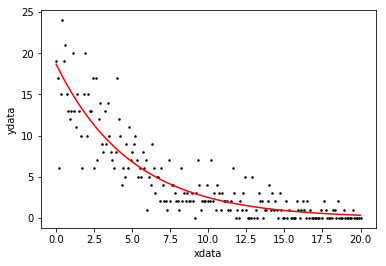

In [7]:
plotFit( x, data=y, model=mdl, fitter=fitter )

In [8]:
fitter = AmoebaFitter( x, mdl )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.220   -0.195]  1055.329        25


In [9]:
fitter = AmoebaFitter( x, mdl, errdis="gauss" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   18.220   -0.195]  1055.329        25


In [10]:
fitter = AmoebaFitter( x, mdl, errdis="laplace" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.857   -0.209]  1089.751        30


In [11]:
fitter = AmoebaFitter( x, mdl, errdis="cauchy" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ) )

[   17.383   -0.212]  1133.293        21


In [12]:
fitter = AmoebaFitter( x, mdl, errdis="poisson" )
param = fitter.fit( y )
print( fmt( param), fmt( fitter.chisq ), fmt( fitter.iter ))

[   18.663   -0.202]  1058.808        26
